<a href="https://colab.research.google.com/github/AKslugger/AKslugger/blob/main/DS_MIONOR_APRIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime --quiet
%load_ext autotime  

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.74 s (started: 2021-05-18 12:53:46 +00:00)


In [ ]:
# Image : Data which are in Matrix Format(Rows* Colmuns)
# Image consist of Pixels - picture Element
# 1. Gray scale image : Row pixel * column pixel
# 2. Color image : Row Pixel * Column Pixel * Depth

time: 1.01 ms (started: 2021-05-18 09:35:17 +00:00)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

#opencv - BGR2GRAY
#Skimage = rgb2gray

# images can be read using Matplotlib by using the imread

time: 2.06 ms (started: 2021-05-18 09:35:17 +00:00)


In [ ]:
#curse of Dimensionality : if number of features are more, then accuracy reduces

time: 686 µs (started: 2021-05-18 09:35:17 +00:00)


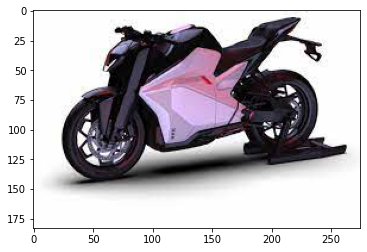

time: 270 ms (started: 2021-05-18 09:35:17 +00:00)


In [ ]:
#displaying the image by matplotlib
path='/content/drive/MyDrive/Colab Notebooks/Images/Bikes/download.jpg'
#img=plt.imread('content/drive/MyDrive/Colab Notebooks/Images/bike/download.jpg')
img=plt.imread(path)
plt.imshow(img)

#img

In [ ]:
img.shape

(183, 275, 3)

time: 3.3 ms (started: 2021-05-18 09:35:17 +00:00)


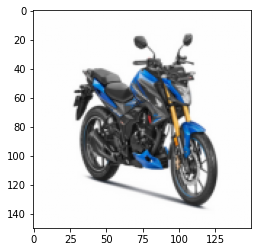

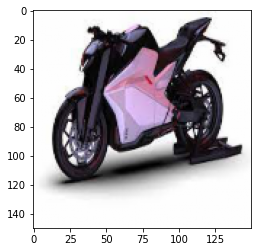

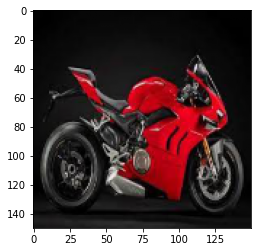

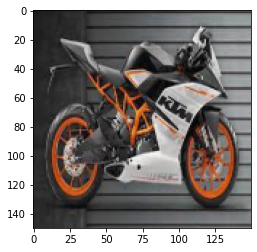

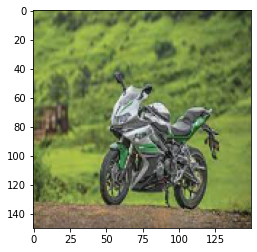

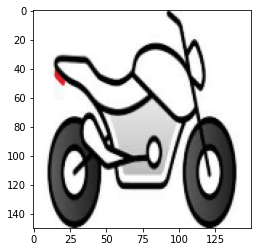

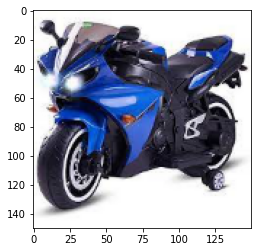

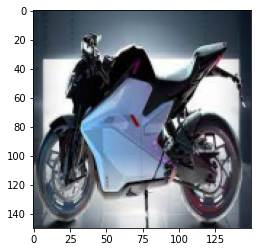

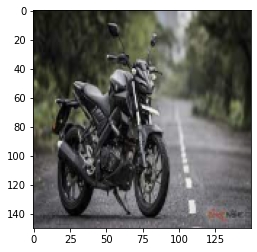

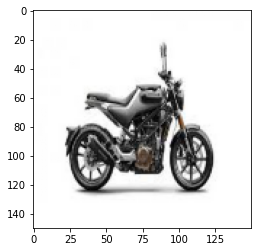

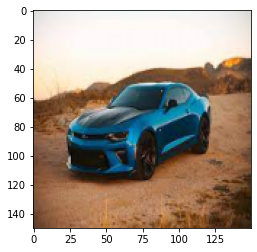

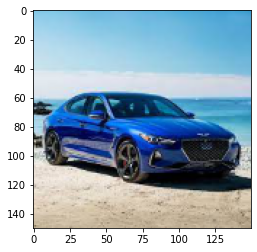

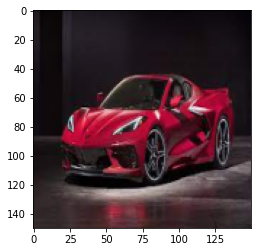

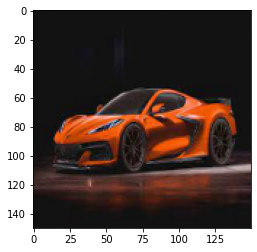

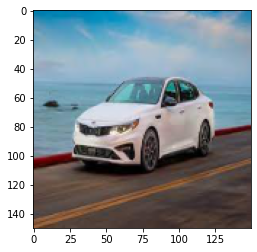

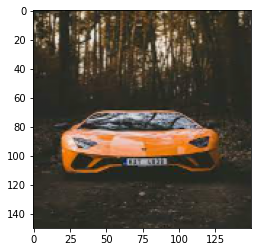

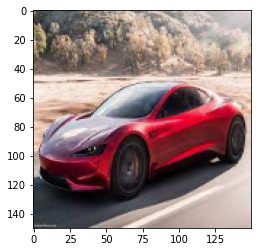

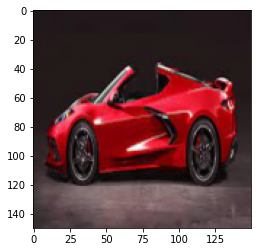

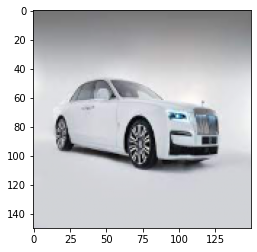

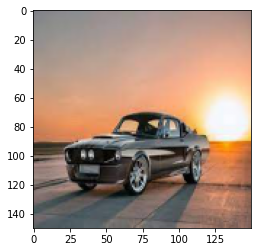

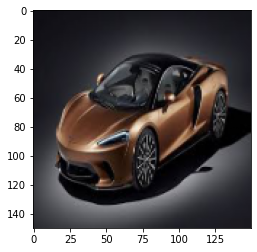

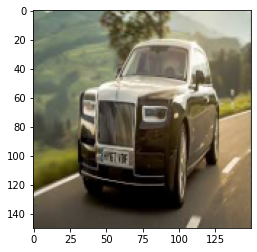

time: 5.24 s (started: 2021-05-18 09:35:17 +00:00)


In [ ]:
import os  #this is required because we are using the lot of folders, and gong from one folder to another
import numpy as np   # for some numerical computations,-
import pandas as pd
import matplotlib.pyplot as plt  #for displaying the image 
from skimage.io import imread    
from skimage.transform import resize

datadir ='/content/drive/MyDrive/Colab Notebooks/Images'
categories=['Bikes','Cars'] # Name the folder with these categories
target =[]
flat_data=[]

for i in categories:
  path=os.path.join(datadir,i)
  #print(path)
  for img in os.listdir(path): #listdir means directory what r alll the files available in 
    #print(img)

    img_array=imread(os.path.join(path,img))
    #print(img_array)
    #print(img_array.shape)
    img_resize=resize(img_array,(150,150,3)) #value gets converted 0-1 from 0-255
    
    flat_data.append(np.ndarray.flatten(img_resize))  #flatten is that converting the 2 Dimrnsion data into 1 dimensional data
    target.append(i)
    plt.imshow(img_resize)
    plt.show()
flat_data=np.array(flat_data)
target=np.array(target)   
    
 
    

   

In [ ]:
len(flat_data[0])

67500

time: 6.24 ms (started: 2021-05-18 09:35:23 +00:00)


In [ ]:
150*150*3

67500

time: 6.55 ms (started: 2021-05-18 09:35:23 +00:00)


In [ ]:
target

array(['Bikes', 'Bikes', 'Bikes', 'Bikes', 'Bikes', 'Bikes', 'Bikes',
       'Bikes', 'Bikes', 'Bikes', 'Cars', 'Cars', 'Cars', 'Cars', 'Cars',
       'Cars', 'Cars', 'Cars', 'Cars', 'Cars', 'Cars', 'Cars'],
      dtype='<U5')

time: 10.4 ms (started: 2021-05-18 09:35:23 +00:00)


In [ ]:
df=pd.DataFrame(flat_data)
df['Target']= target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,Bikes
1,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,Bikes
2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000784,0.000784,0.000784,0.003922,0.003922,0.003922,0.007059,...,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,Bikes
3,0.098176,0.098176,0.098176,0.099889,0.099889,0.099889,0.102248,0.102248,0.102248,0.105979,0.105979,0.105979,0.107224,0.107224,0.107224,0.113795,0.113795,0.113795,0.118418,0.118418,0.118418,0.125490,0.125490,0.125490,0.114013,0.114013,0.114013,0.114013,0.114013,0.114013,0.117650,0.117650,0.117650,0.117935,0.117935,0.117935,0.117935,0.117935,0.117935,0.121346,...,0.514769,0.514769,0.506926,0.518667,0.518667,0.510824,0.514784,0.514784,0.506941,0.511046,0.511046,0.503203,0.507307,0.507307,0.499464,0.506902,0.506902,0.499059,0.502980,0.502980,0.495137,0.502763,0.502763,0.495137,0.502693,0.502693,0.495137,0.502693,0.502693,0.495137,0.502870,0.502870,0.495137,0.506614,0.506614,0.498771,0.506902,0.506902,0.499059,Bikes
4,0.533720,0.639602,0.262504,0.515474,0.620336,0.259485,0.516549,0.614627,0.285141,0.545006,0.639150,0.332510,0.585613,0.677009,0.392067,0.555070,0.645697,0.367241,0.505336,0.595963,0.316517,0.486576,0.577204,0.292682,0.484871,0.577891,0.297831,0.471638,0.557913,0.318327,0.458001,0.544275,0.294707,0.438138,0.526716,0.270559,0.425275,0.515471,0.244882,0.434322,...,0.297784,0.262490,0.203667,0.291170,0.259798,0.208817,0.294556,0.246791,0.184046,0.343839,0.292859,0.230114,0.396517,0.345536,0.282791,0.313267,0.262286,0.199541,0.221260,0.170280,0.107535,0.283136,0.232155,0.169410,0.399065,0.348085,0.285340,0.356547,0.305567,0.242822,0.302098,0.254259,0.191514,0.251715,0.216421,0.149755,0.328005,0.292711,0.226044,Bikes


time: 160 ms (started: 2021-05-18 09:35:23 +00:00)


<BarContainer object of 2 artists>

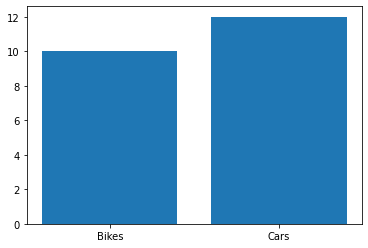

time: 130 ms (started: 2021-05-18 09:35:23 +00:00)


In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(categories,count)

In [ ]:
#split data into Training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)



time: 11.2 ms (started: 2021-05-18 09:35:23 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import  svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 5.87 s (started: 2021-05-18 09:35:23 +00:00)


In [ ]:
y_pred=clf.predict(x_test)
y_pred

array(['Cars', 'Bikes', 'Cars', 'Cars', 'Cars', 'Cars', 'Cars'],
      dtype='<U5')

time: 19 ms (started: 2021-05-18 09:35:29 +00:00)


In [ ]:
y_test

array(['Cars', 'Bikes', 'Cars', 'Cars', 'Bikes', 'Cars', 'Cars'],
      dtype='<U5')

time: 4.87 ms (started: 2021-05-18 09:35:29 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.56 ms (started: 2021-05-18 09:35:29 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.8571428571428571

time: 7.05 ms (started: 2021-05-18 09:35:29 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[1, 0],
       [1, 5]])

time: 7.7 ms (started: 2021-05-18 09:35:29 +00:00)


In [ ]:
# save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))
#check the files img_model.p is created

time: 34.4 ms (started: 2021-05-18 09:35:29 +00:00)


In [ ]:
model=pickle.load(open('img_model.p','rb'))

time: 16 ms (started: 2021-05-18 09:35:29 +00:00)


enter the urlhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPQQl8pudAW0elv-cqmXwlbTLh0Fzc9ciGAQ&usqp=CAU
(176, 286, 3)


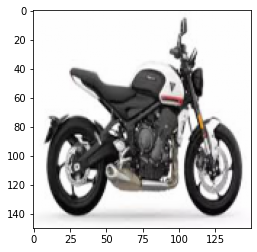

PREDICTED OUTPUT:['Bikes']
time: 4.11 s (started: 2021-05-18 12:58:47 +00:00)


In [ ]:
# Testing  a brand new image

#print(img_array)
#print(img_array.shape)
flat_data=[]
url=input('enter the url')
img=imread(url)
img_resize=resize(img,(150,150,3)) #value gets converted 0-1 from 0-255
    
flat_data.append(np.ndarray.flatten(img_resize))  #flatten is that converting the 2 Dimrnsion data into 1 dimensional data


flat_data=np.array(flat_data)  
print(img.shape)
plt.imshow(img_resize)
plt.show() 

y_out = model.predict(flat_data)
print(f'PREDICTED OUTPUT:{y_out}')
#y_out = categories[y_out[0][0]]



